## Importar bibliotecas

In [1]:
%run ../services/imports.py
%run ../services/visualization.py

In [2]:
# Criar instância da classe
visualizacao = Visualizacao()

## Carregar a base de dados

In [3]:
df_poscomp = pd.read_csv("../dados/processed/df_poscomp2016-2022.csv")

In [4]:
# converter os type das colunas
df_poscomp["ano"] = df_poscomp["ano"].astype("object")

In [5]:
# Primeiramente, será excluídos candidatos que realizaram o exame no Peru
df_poscomp = df_poscomp.query("estado != 'ou'")

In [6]:
df_poscomp.dropna(inplace=True)

In [7]:
for coluna in df_poscomp.columns:
    if df_poscomp[coluna].dtype == float:
        df_poscomp[coluna] = df_poscomp[coluna].astype('int32')

## Visualização de candidatos inscritos por sexo no decorrer dos anos.

In [8]:
qtd_sexo = df_poscomp.groupby(["sexo", "ano"]).size().reset_index(name="counts")
qtd_sexo["sexo"] = qtd_sexo["sexo"].replace({"feminino": "Feminino", "masculino": "Masculino"})

## Agrupamento das especializadades

In [9]:
df_poscomp

,idade,sexo,estado,presença,cargo,especialidade,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,1,1,1,1,...,1,2,2,3,3,2,2016,14,21,10
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,3,2,2,1,...,2,3,2,3,3,3,2016,16,22,12
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,1,0,2,1,...,1,2,2,2,3,1,2016,4,16,8
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,2,0,1,0,...,2,1,0,2,3,1,2016,4,13,7
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,2,1,1,0,...,1,3,2,2,3,2,2016,6,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13991,1995-10-31,masculino,pr,s,autoavaliação,inteligência artificial,1,1,3,1,...,1,2,0,3,3,2,2022,6,17,8
13992,1998-06-12,masculino,ma,s,mestrado/doutorado,inteligência artificial,1,0,1,0,...,1,2,0,0,1,0,2022,3,6,7
13993,1989-04-17,feminino,pr,s,autoavaliação,aprendizado de máquina,2,0,0,2,...,1,0,0,1,2,1,2022,1,12,6
13994,2000-07-03,masculino,rj,s,mestrado/doutorado,otimização,1,1,1,0,...,1,2,1,0,2,1,2022,8,11,7


In [10]:
df = df_poscomp.query('presença != "n"')

In [11]:
df = df.iloc[:,5:31]

In [12]:
def calcular_percentagem_acertos(dados, coluna_acertos):
    dados["%acerto_" + coluna_acertos] = (
        dados[coluna_acertos] / dados[coluna_acertos].sum()
    ) * 100

In [13]:
df['especialidade'].value_counts()

especialidade
inteligência artificial                  1990
engenharia de software                   1877
sistemas de computação                   1179
redes de computadores                     888
sistemas de informação                    635
computação aplicada                       561
banco de dados                            458
aplicações computacionais                 372
Demais áreas                              367
otimização                                333
aprendizado de máquina                    326
metodologias e técnicas de computação     263
sistemas inteligentes                     232
modelagem computacional                   208
sistemas embarcados                       195
visão computacional                       158
computação gráfica                        153
teoria da computação                      152
tecnologia da informação                  134
informática na educação                   134
ciência de dados                          124
processamento parale

In [14]:
# Exemplo de uso:
# Supondo que 'teste_dados' é o seu DataFrame
for i in df.columns[1:]:
    calcular_percentagem_acertos(df, i)

In [15]:
def sumAxis(dados, columns_axis):
   return dados.groupby("especialidade")[columns_axis].sum().reset_index()

In [16]:
colunas_para_processar = df.columns[df.columns.str.startswith("%acerto_")]
resultados_df = sumAxis(df, colunas_para_processar)

In [17]:
resultados_df = resultados_df.round()
resultados_df.head()

,especialidade,%acerto_algoritmos_e_estruturas_de_dados,%acerto_analise_combinatoria,%acerto_analise_de_algoritmos,%acerto_arquitetura_e_organizacao_de_computadores,%acerto_banco_de_dados,%acerto_calculo_diferencial_e_integral,%acerto_circuitos_digitais,%acerto_compiladores,%acerto_computacao_grafica,...,%acerto_matematica_discreta,%acerto_organizacao_de_arquivos_e_dados,%acerto_probabilidade_e_estatistica,%acerto_processamento_de_imagens,%acerto_redes_de_computadores,%acerto_sistemas_distribuidos,%acerto_sistemas_operacionais,%acerto_teoria_dos_grafos,%acerto_tecnicas_de_programacao,%acerto_algebra_linear
0,Demais áreas,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0
1,aplicações computacionais,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
2,aprendizado de máquina,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,arquitetura de computadores,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4,banco de dados,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


### Participantes que escolhem as especialidade

In [18]:
teste = df.groupby('especialidade').size().reset_index(name='count').sort_values(by='count', ascending=False)
qtd_total_esp = teste['count'].sum()

In [19]:
teste['%fre_acu'] = (teste['count'] / qtd_total_esp) * 100

In [20]:
frequencia_espec = teste.round({'%fre_acu':2})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


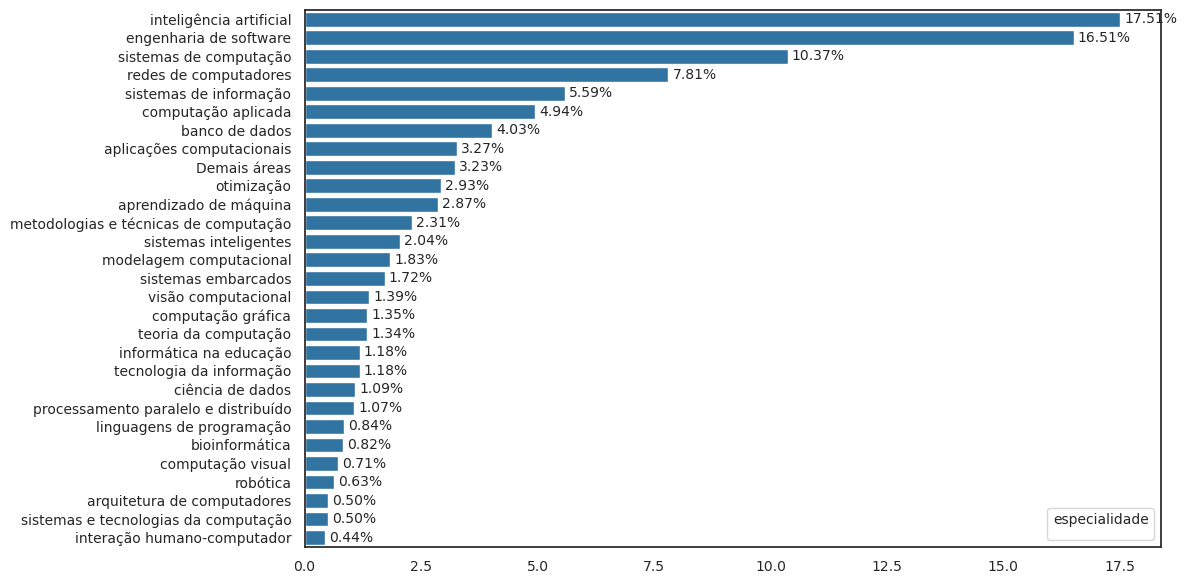

In [21]:
visualizacao.barplot_view_procents(dataframe=frequencia_espec, y='especialidade', x='%fre_acu', figsize=(12,6),
                                    fontsize=10, title_legend='especialidade');

### Analysis of participants who answered the questions correctly by specialty

In [22]:
df_participants = df_poscomp.query('cargo != "autoavaliação"')
df_participants.drop(columns=['cargo', 'presença'], inplace=True)
df_participants

,idade,sexo,estado,especialidade,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,banco_de_dados,calculo_diferencial_e_integral,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
0,1989-11-29,masculino,ce,teoria da computação,1,1,1,1,1,3,...,1,2,2,3,3,2,2016,14,21,10
1,1995-02-23,masculino,rs,metodologias e técnicas de computação,3,2,2,1,1,2,...,2,3,2,3,3,3,2016,16,22,12
2,1991-12-13,masculino,sp,engenharia de software,1,0,2,1,1,1,...,1,2,2,2,3,1,2016,4,16,8
3,1986-09-29,masculino,pa,sistemas de informação,2,0,1,0,0,0,...,2,1,0,2,3,1,2016,4,13,7
4,1997-12-26,feminino,am,computação gráfica,2,1,1,0,1,0,...,1,3,2,2,3,2,2016,6,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,1987-04-15,masculino,sp,Demais áreas,0,0,3,0,0,2,...,0,0,0,1,2,2,2022,8,11,2
13990,2001-10-07,masculino,sp,sistemas de informação,2,0,0,1,0,0,...,0,1,1,3,0,0,2022,1,11,6
13992,1998-06-12,masculino,ma,inteligência artificial,1,0,1,0,1,0,...,1,2,0,0,1,0,2022,3,6,7
13994,2000-07-03,masculino,rj,otimização,1,1,1,0,1,0,...,1,2,1,0,2,1,2022,8,11,7


In [23]:
df_participants.describe().T

,count,mean,std,min,25%,50%,75%,max
algoritmos_e_estruturas_de_dados,11340.0,1.636155,0.955892,0.0,1.0,2.0,2.0,3.0
analise_combinatoria,11340.0,1.189065,0.893413,0.0,1.0,1.0,2.0,3.0
analise_de_algoritmos,11340.0,1.700617,1.026529,0.0,1.0,2.0,3.0,3.0
arquitetura_e_organizacao_de_computadores,11340.0,0.918342,0.783482,0.0,0.0,1.0,1.0,3.0
banco_de_dados,11340.0,0.911376,0.778262,0.0,0.0,1.0,1.0,3.0
calculo_diferencial_e_integral,11340.0,1.103263,0.834485,0.0,1.0,1.0,2.0,3.0
circuitos_digitais,11340.0,1.242240,0.856879,0.0,1.0,1.0,2.0,3.0
compiladores,11340.0,0.575926,0.639943,0.0,0.0,0.0,1.0,2.0
computacao_grafica,11340.0,0.505732,0.606621,0.0,0.0,0.0,1.0,2.0
engenharia_de_software,11340.0,1.052557,0.894007,0.0,0.0,1.0,2.0,3.0


In [24]:
df_participants

,idade,sexo,estado,especialidade,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,banco_de_dados,calculo_diferencial_e_integral,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
0,1989-11-29,masculino,ce,teoria da computação,1,1,1,1,1,3,...,1,2,2,3,3,2,2016,14,21,10
1,1995-02-23,masculino,rs,metodologias e técnicas de computação,3,2,2,1,1,2,...,2,3,2,3,3,3,2016,16,22,12
2,1991-12-13,masculino,sp,engenharia de software,1,0,2,1,1,1,...,1,2,2,2,3,1,2016,4,16,8
3,1986-09-29,masculino,pa,sistemas de informação,2,0,1,0,0,0,...,2,1,0,2,3,1,2016,4,13,7
4,1997-12-26,feminino,am,computação gráfica,2,1,1,0,1,0,...,1,3,2,2,3,2,2016,6,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,1987-04-15,masculino,sp,Demais áreas,0,0,3,0,0,2,...,0,0,0,1,2,2,2022,8,11,2
13990,2001-10-07,masculino,sp,sistemas de informação,2,0,0,1,0,0,...,0,1,1,3,0,0,2022,1,11,6
13992,1998-06-12,masculino,ma,inteligência artificial,1,0,1,0,1,0,...,1,2,0,0,1,0,2022,3,6,7
13994,2000-07-03,masculino,rj,otimização,1,1,1,0,1,0,...,1,2,1,0,2,1,2022,8,11,7


In [25]:
def evaluateQuestionsParticipant(df, attribute, questions):
    for question in questions:
        acertos = df[df[question] > 0].groupby(attribute).size().reset_index(name='acerto')
        erros = df[df[question] == 0].groupby(attribute).size().reset_index(name='erro')

        df_acertos = pd.DataFrame(acertos)
        df_acertos.columns = [attribute, "acertos_" + question]
        df = df.merge(df_acertos, on=attribute, how='left')

        df_erros = pd.DataFrame(erros)
        df_erros.columns = [attribute, "erros_" + question]
        df = df.merge(df_erros, on=attribute, how='left')
    
    return df

In [26]:
listQuestions = ['algoritmos_e_estruturas_de_dados', 'analise_combinatoria',
       'analise_de_algoritmos', 'arquitetura_e_organizacao_de_computadores',
       'banco_de_dados', 'calculo_diferencial_e_integral',
       'circuitos_digitais', 'compiladores', 'computacao_grafica',
       'engenharia_de_software', 'geometria_analitica',
       'inteligencia_artificial', 'linguagens_de_programacao',
       'linguagens_formais_automatos_e_computabilidade', 'logica_matematica',
       'matematica_discreta', 'organizacao_de_arquivos_e_dados',
       'probabilidade_e_estatistica', 'processamento_de_imagens',
       'redes_de_computadores', 'sistemas_distribuidos',
       'sistemas_operacionais', 'teoria_dos_grafos', 'tecnicas_de_programacao',
       'algebra_linear']

In [27]:
testeCorrets, testeErrors = evaluateQuestionsParticipant(df_participants, 'especialidade', listQuestions)

ValueError: too many values to unpack (expected 2)